In [35]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [36]:
# Data Import
df = pd.read_csv("data/training_small.txt", sep='\t', encoding='ISO-8859-1', header=0, low_memory=False, index_col=0)

df.head(3)

,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,AvgFloorU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
BuildingID,,,,,,,,,,,,,,,,,,,,,
190835,Co. Wexford,Mid-terrace house,Y1890.0,Existing,F,418.42,52.04 sq. m,2.10,2.30,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2335.6809
523113,Co. Clare,Detached house,Y1901.0,Existing,G,520.35,147.44 sq. m,2.01,0.75,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7144.838,4470.0759
271393,Co. Kerry,Detached house,Y1968.0,Existing,D2,281.33,104.84 sq. m,0.38,0.13,0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127.347,5837.4729


## Statistical Analysis on the dependent variable: EnergyRatingCont

In [37]:
# EnergyRatingCont
df.loc[:, 'EnergyRatingCont'].describe()

count    4999.000000
mean      258.078954
std       150.870140
min        18.940000
25%       173.325000
50%       223.810000
75%       297.410000
max      2016.710000
Name: EnergyRatingCont, dtype: float64

In [38]:
# Is there any null values in this column?
df.loc[:, 'EnergyRatingCont'].isnull().sum()

0

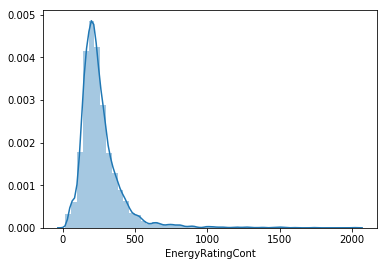

In [39]:
sns.distplot(df['EnergyRatingCont']);

Now it's time to go deep and understand how 'EnergyRatingCont' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

**Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

**Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

**Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

**Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Normality

The point here is to test 'EnergyRatingCont' in a very lean way. We'll do this paying attention to:

* **Histogram** - Kurtosis and skewness.

* **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

### EnergyRatingCont

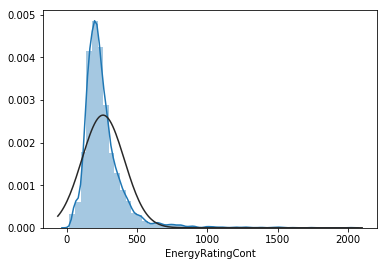

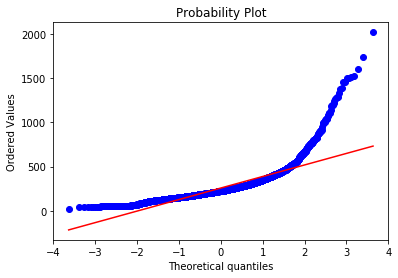

In [40]:
# histogram and normal probability plot
sns.distplot(df['EnergyRatingCont'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EnergyRatingCont'], plot=plt)

Ok, 'EnergyRatingCont' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well.

In [41]:
#applying log transformation
df['EnergyRatingCont'] = np.log(df['EnergyRatingCont'])

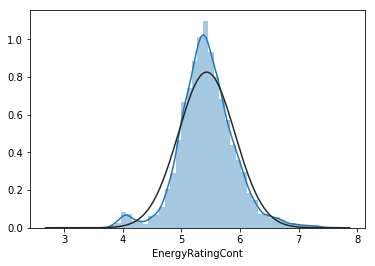

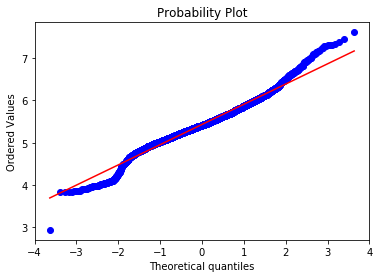

In [42]:
# histogram and normal probability plot
sns.distplot(df['EnergyRatingCont'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EnergyRatingCont'], plot=plt)

### GroundFloorArea

In [43]:
df['pGroundFloorArea'] = df['GroundFloorArea'].map(lambda x: float(x[:-5]))
df['pGroundFloorArea'].head()

BuildingID
190835     52.04
523113    147.44
271393    104.84
585961     95.31
624083    283.87
Name: pGroundFloorArea, dtype: float64

In [44]:
df['pGroundFloorArea'].fillna(df['pGroundFloorArea'].mean(), inplace=True)
df['pGroundFloorArea'].isnull().sum()

0

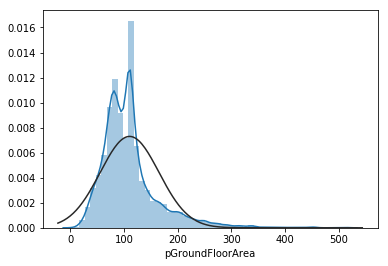

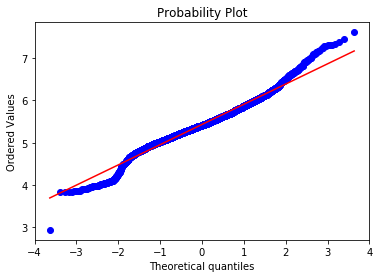

In [45]:
# histogram and normal probability plot
sns.distplot(df['pGroundFloorArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EnergyRatingCont'], plot=plt)

In [46]:
#applying log transformation
df['pGroundFloorArea'] = np.log(df['pGroundFloorArea'])

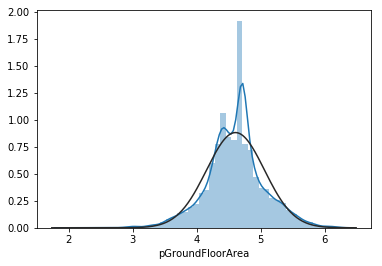

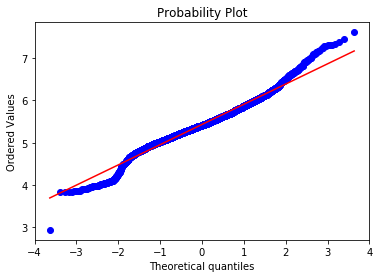

In [47]:
# histogram and normal probability plot
sns.distplot(df['pGroundFloorArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EnergyRatingCont'], plot=plt)

## Homoscedasticity

**Homoscedasticity**. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X).

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

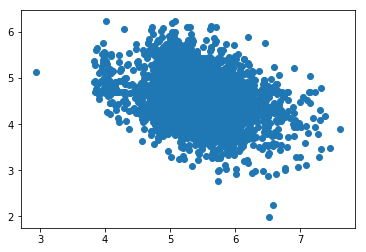

In [49]:
#scatter plot
plt.scatter(df['EnergyRatingCont'], df['pGroundFloorArea']);